In [1]:
library("IRdisplay")

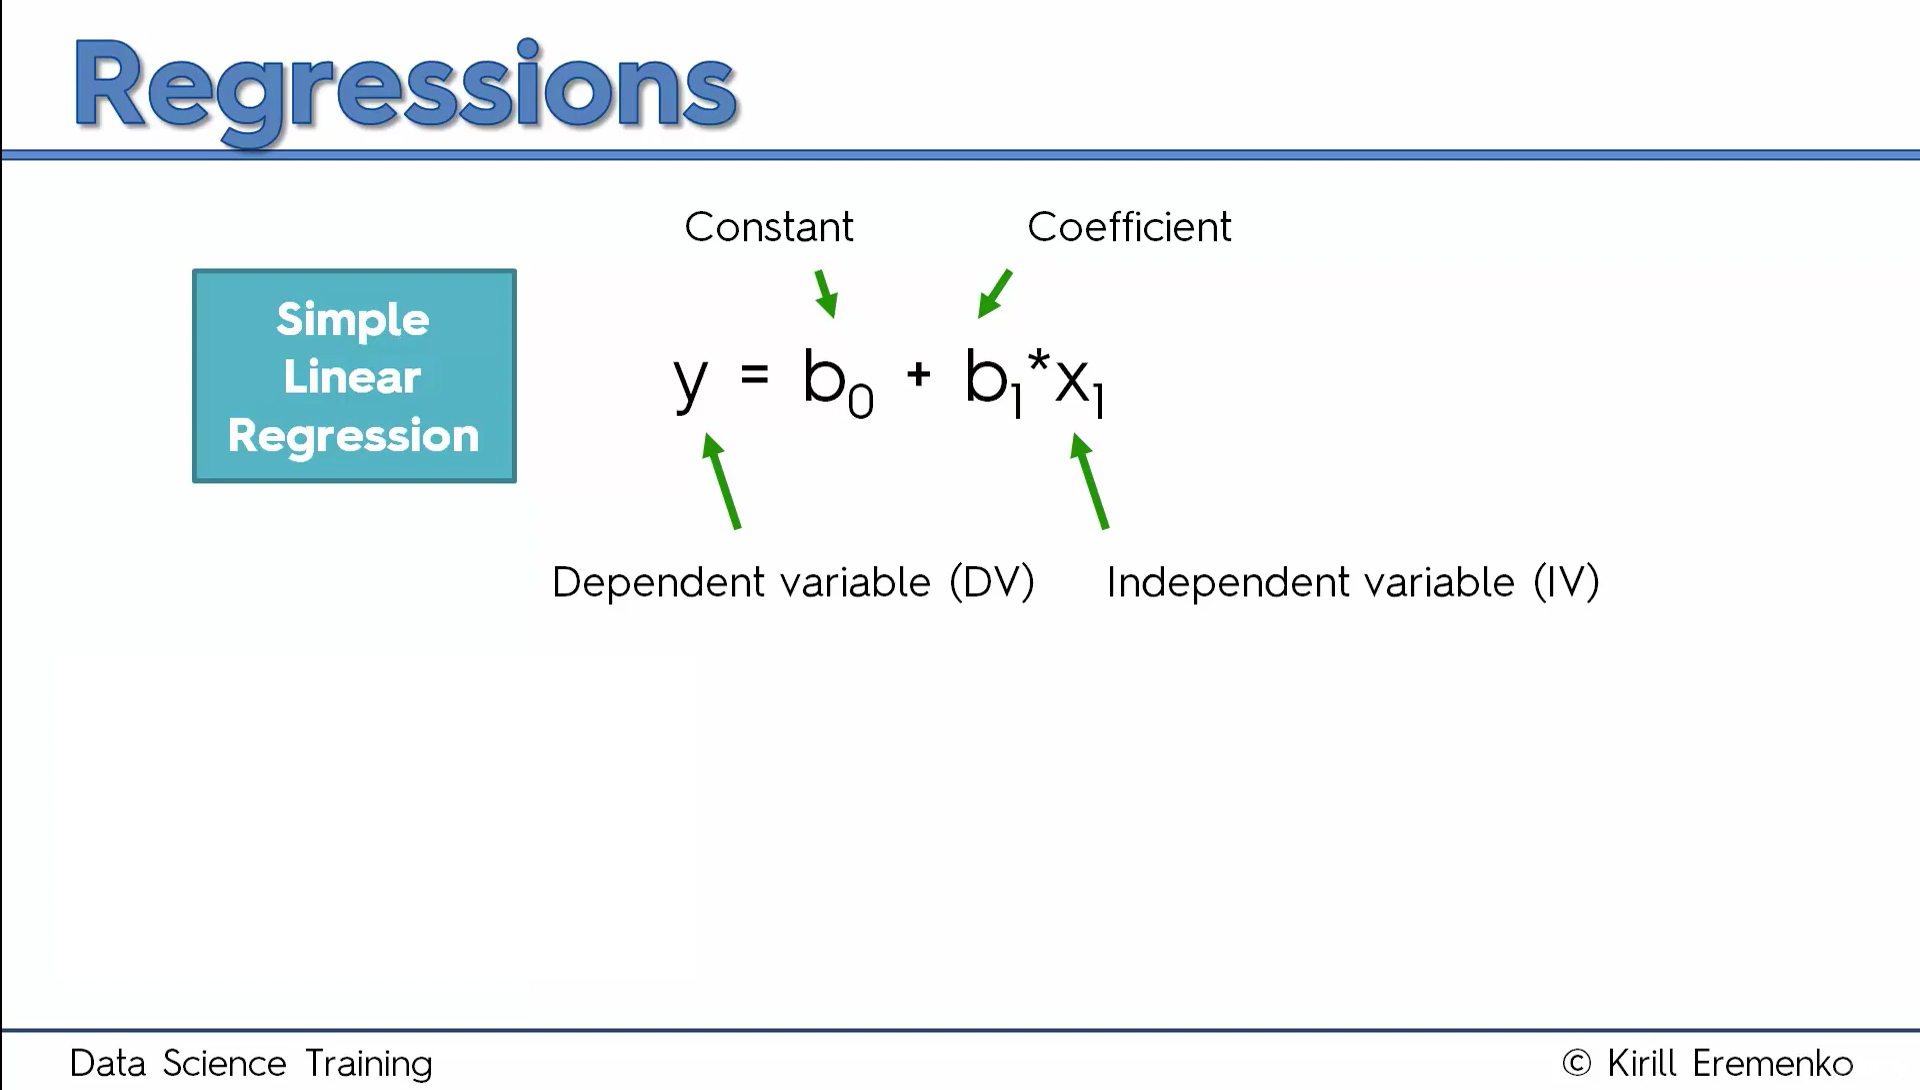

In [2]:
display_png(file="img/01.png")  


* * *
* b0 is **constant** representing the base salary of anyone who come to profession 
and have no experience i.e. Experience = 0
* b1 is **coefficient** representing the slope. The more experience the more raise will be their in salary.

Here in the graph, the black line is **Best Fitting Line**
* * *


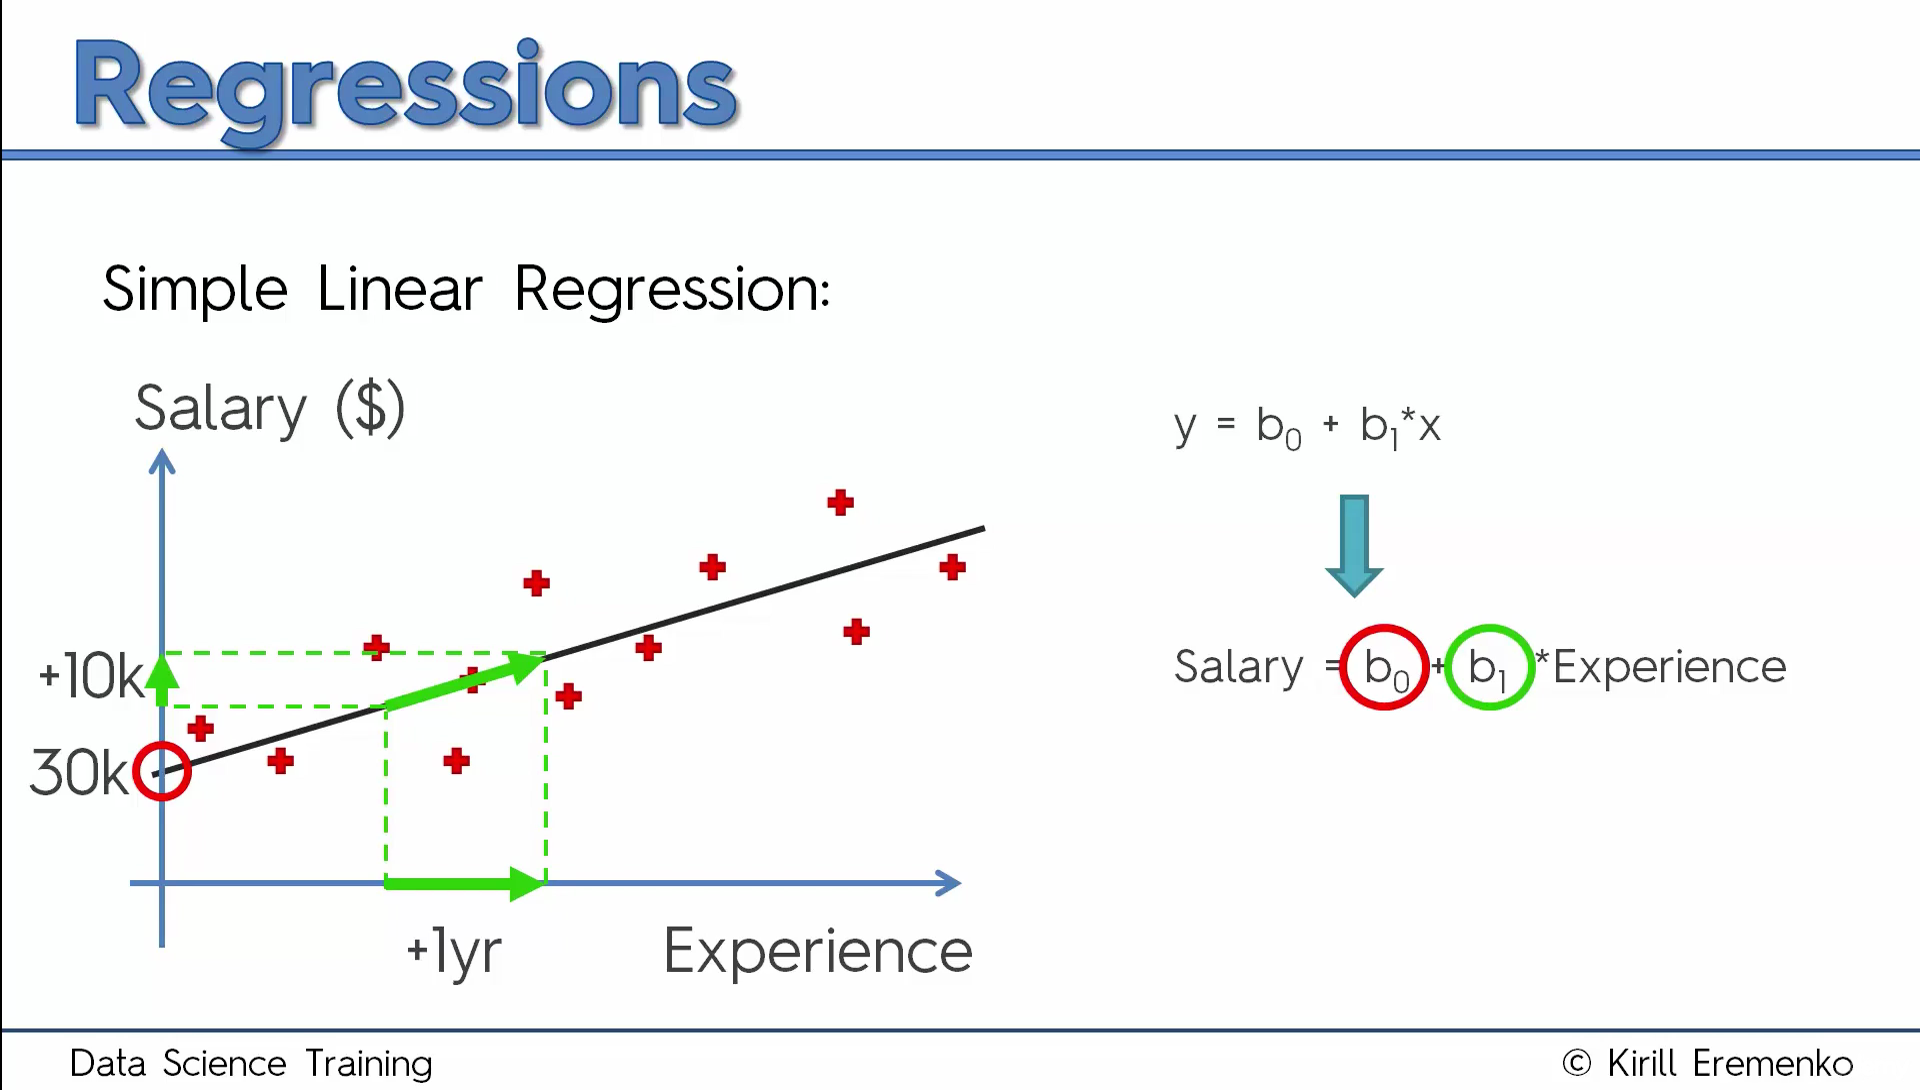

In [5]:
display_png(file="img/02.png")  

### Actual value vs Model value and Ordinary Least Square

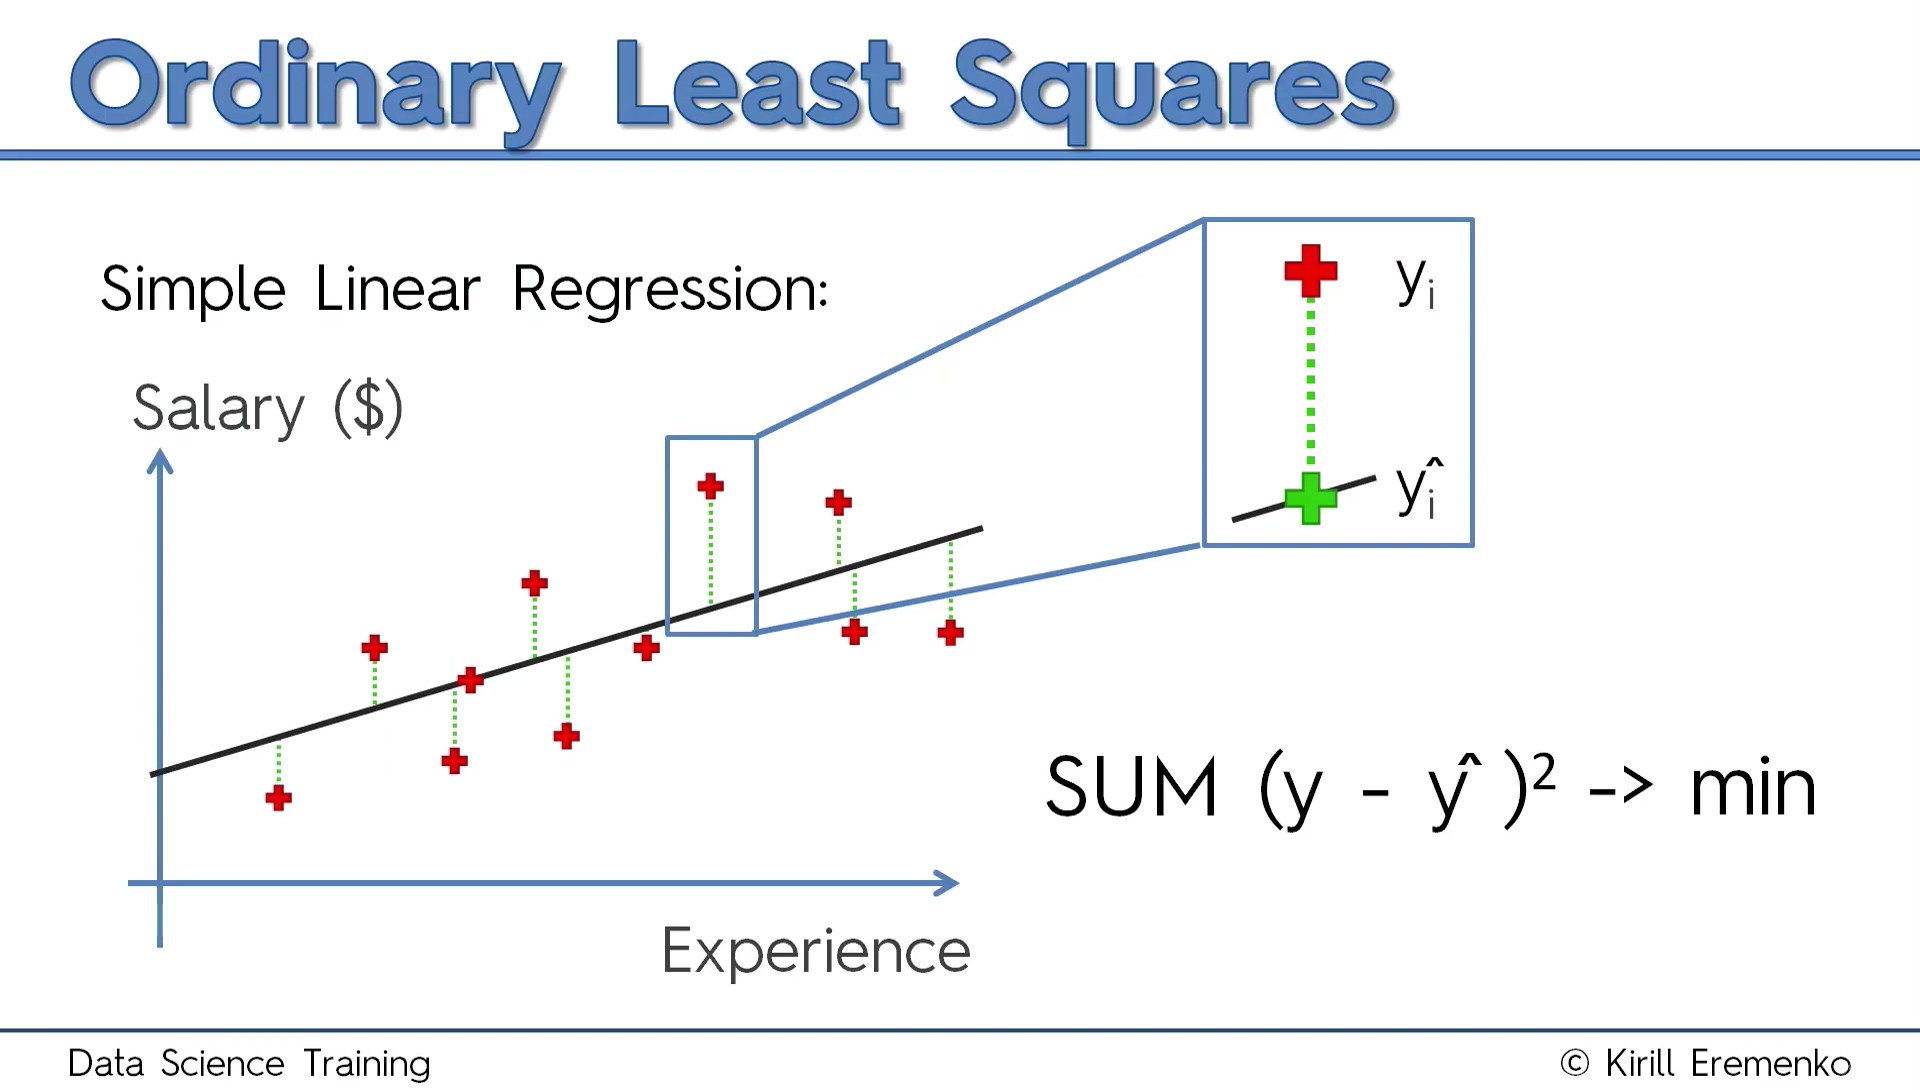

In [4]:
display_png(file="img/03.png")  

### Data Preprocessing

In [22]:
# Importing the dataset
dataset = read.csv('Salary_Data.csv')

# Splitting the dataset into the Training set and Test set
# install.packages('caTools')
library(caTools)
set.seed(123)
split = sample.split(dataset$Salary, SplitRatio = 0.75)
training_set = subset(dataset, split == TRUE)
test_set = subset(dataset, split == FALSE)

# Feature Scaling
# training_set = scale(training_set)
# test_set = scale(test_set)

In [23]:
training_set

,YearsExperience,Salary
1,1.1,39343
2,1.3,46205
3,1.5,37731
6,2.9,56642
7,3.0,60150
9,3.2,64445
10,3.7,57189
12,4.0,55794
13,4.0,56957
14,4.1,57081


In [24]:
test_set

,YearsExperience,Salary
4,2.0,43525
5,2.2,39891
8,3.2,54445
11,3.9,63218
16,4.9,67938
20,6.0,93940
21,6.8,91738
24,8.2,113812


### Fitting Simple Linear Regression to the Training Set

In [25]:
regressor = lm(formula = Salary ~ YearsExperience, data = training_set)

In [26]:
summary(regressor)


Call:
lm(formula = Salary ~ YearsExperience, data = training_set)

Residuals:
    Min      1Q  Median      3Q     Max 
-7853.2 -3691.2   904.8  3191.0  8080.8 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      27232.5     2474.3   11.01 6.17e-10 ***
YearsExperience   9103.7      392.9   23.17 6.38e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5471 on 20 degrees of freedom
Multiple R-squared:  0.9641,	Adjusted R-squared:  0.9623 
F-statistic:   537 on 1 and 20 DF,  p-value: 6.382e-16



* * *
The smaller the p-value the more significant is the Independent variable on the formula of dependent variable.

[Watch this video for more information on p-value](https://www.youtube.com/watch?v=eyknGvncKLw)
* * *


### Predicting the Test set result

In [27]:
y_pred = predict(regressor, newdata = test_set)

In [28]:
y_pred

4         5         8        11        16        20        21        24 
 45439.82  47260.56  56364.22  62736.79  71840.46  81854.50  89137.43 101882.57

### Visualising the Training set results

* **X = Years of Experience**
* **Y = Salary**

In [29]:
# install.packages('ggplot2')
# package to plot graph
library(ggplot2)

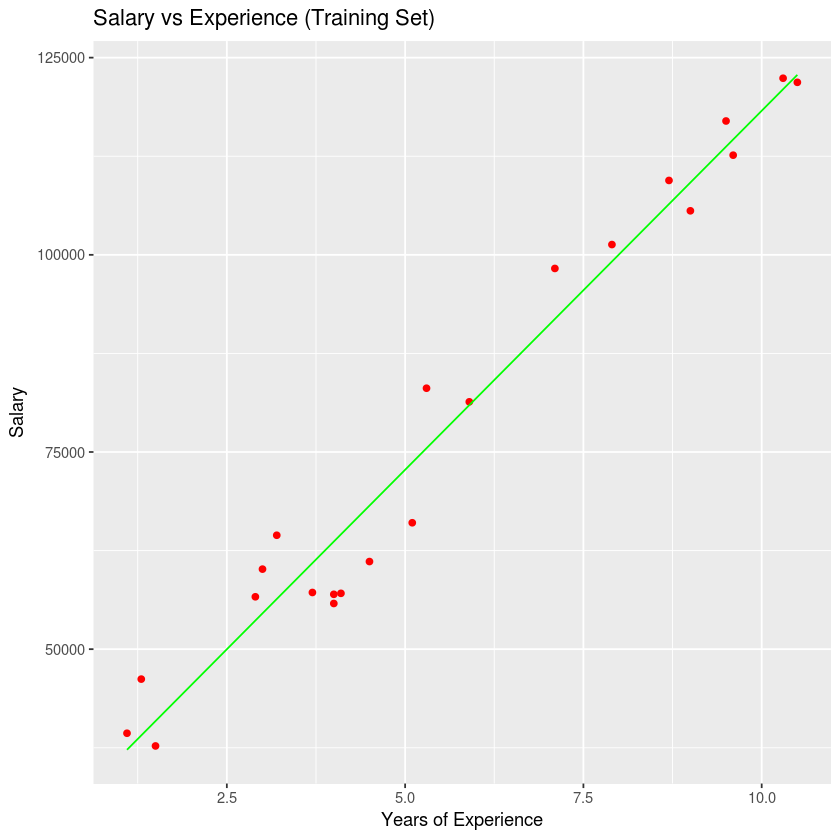

In [35]:
## geom for geometrical
ggplot() +
    geom_point(aes(x = training_set$YearsExperience, y = training_set$Salary),
               colour = 'red') +
    geom_line(aes(x = training_set$YearsExperience, y = predict(regressor, newdata = training_set)),
              colour = 'green') +
    ggtitle('Salary vs Experience (Training Set)') +
    xlab('Years of Experience') +
    ylab('Salary')

### Visualising the Test set results

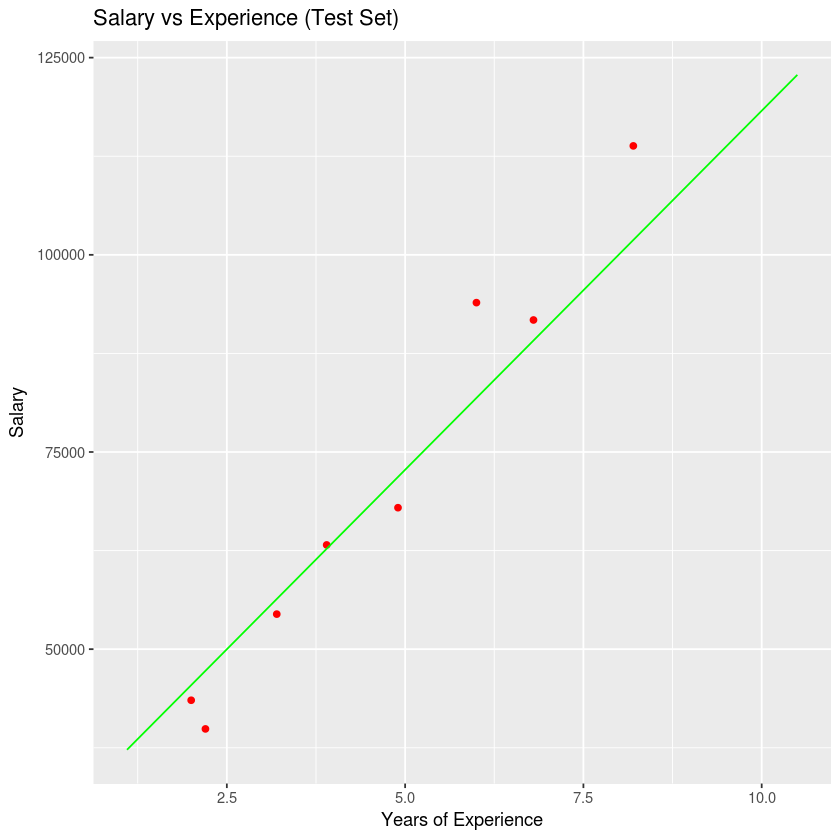

In [34]:
ggplot() +
    geom_point(aes(x = test_set$YearsExperience, y = test_set$Salary),
               colour = 'red') +
    geom_line(aes(x = training_set$YearsExperience, y= predict(regressor, newdata = training_set)),
              colour = 'green') +
    ggtitle('Salary vs Experience (Test Set)') +
    xlab('Years of Experience') +
    ylab('Salary')